In [9]:
import tensorflow as tf
import sklearn
from sklearn.datasets import load_breast_cancer

In [10]:
data = load_breast_cancer()

In [11]:
type(data)

sklearn.utils.Bunch

In [12]:
sklearn.utils.Bunch

sklearn.utils.Bunch

In [13]:
#Note It is a Bunch Object
# This Basically act like a dictionery where you can treat the keys like attribute
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [15]:
data.data.shape

(569, 30)

In [18]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [17]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [19]:
data.target.shape

(569,)

In [22]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [24]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(data.data, data.target, test_size = 0.3)
N, D = x_train.shape

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [40]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(1, input_shape=(D,), activation='sigmoid'))

model.compile(optimizer = 'adam',
             loss='binary_crossentropy',
             metrics = ['accuracy'])

r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs =100)

print('Train Score: ', model.evaluate(x_train, y_train))
print('Test Score: ', model.evaluate(x_test, y_test))

Train on 398 samples, validate on 171 samples
Epoch 1/100
398/398 [==============================] - 0s 882us/sample - loss: 0.8870 - acc: 0.4623 - val_loss: 0.7151 - val_acc: 0.5614
Epoch 2/100
398/398 [==============================] - 0s 103us/sample - loss: 0.8091 - acc: 0.5050 - val_loss: 0.6515 - val_acc: 0.6023
Epoch 3/100
398/398 [==============================] - 0s 89us/sample - loss: 0.7377 - acc: 0.5678 - val_loss: 0.5963 - val_acc: 0.6491
Epoch 4/100
398/398 [==============================] - 0s 105us/sample - loss: 0.6760 - acc: 0.6131 - val_loss: 0.5485 - val_acc: 0.7251
Epoch 5/100
398/398 [==============================] - 0s 94us/sample - loss: 0.6216 - acc: 0.6809 - val_loss: 0.5068 - val_acc: 0.7485
Epoch 6/100
398/398 [==============================] - 0s 88us/sample - loss: 0.5757 - acc: 0.7261 - val_loss: 0.4698 - val_acc: 0.7778
Epoch 7/100
398/398 [==============================] - 0s 104us/sample - loss: 0.5352 - acc: 0.7538 - val_loss: 0.4387 - val_acc: 0.818

398/398 [==============================] - 0s 115us/sample - loss: 0.1347 - acc: 0.9673 - val_loss: 0.1301 - val_acc: 0.9766
Epoch 61/100
398/398 [==============================] - 0s 127us/sample - loss: 0.1333 - acc: 0.9673 - val_loss: 0.1288 - val_acc: 0.9766
Epoch 62/100
398/398 [==============================] - 0s 130us/sample - loss: 0.1318 - acc: 0.9673 - val_loss: 0.1278 - val_acc: 0.9766
Epoch 63/100
398/398 [==============================] - 0s 89us/sample - loss: 0.1304 - acc: 0.9673 - val_loss: 0.1269 - val_acc: 0.9766
Epoch 64/100
398/398 [==============================] - 0s 82us/sample - loss: 0.1291 - acc: 0.9673 - val_loss: 0.1258 - val_acc: 0.9766
Epoch 65/100
398/398 [==============================] - 0s 85us/sample - loss: 0.1279 - acc: 0.9698 - val_loss: 0.1251 - val_acc: 0.9766
Epoch 66/100
398/398 [==============================] - 0s 87us/sample - loss: 0.1265 - acc: 0.9698 - val_loss: 0.1240 - val_acc: 0.9766
Epoch 67/100
398/398 [=============================

[]

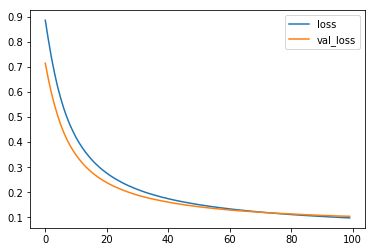

In [41]:
#model. fit returns a object that contain data from training process
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.plot()

[]

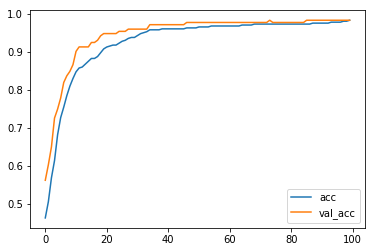

In [42]:
#accuracy plot
plt.plot(r.history['acc'], label = 'acc')
plt.plot(r.history['val_acc'], label='val_acc')
plt.legend()
plt.plot()